In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../code-previous")
sys.path.insert(0, "..")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import utils
import time
import os

import nltk
stopwords = nltk.corpus.stopwords.words('english')

from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
path2rawdata = '/mnt/disks/vault/wos2017-parsed/'

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
raw_data_path = "/mnt/disks/vault/analysis-data/raw_data_full/raw_data_full.pql"
data = pd.read_pickle(raw_data_path)

In [5]:
# New fields to dataframe 
data['log_c5'] = data['c5'].progress_apply(lambda x: np.log(x+1))
data['character_count'] = data['Title'].progress_apply(lambda x: len(x))
data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data['title_without_punct'] = data['Title'].progress_apply(lambda x: 
                                                           str.lower(''.join(ch for ch in str(x) if category(ch)[0] != 'P')))
data["title_without_stopwords"] = data['title_without_punct'].progress_apply(lambda x: 
                                                                            " ".join([word for word in x.split() if word not in stopwords]))


data["word_count"] = data["Title"].progress_apply(lambda x: len(x.split()))
data["cleaned_title_word_count"] = data["title_without_stopwords"].progress_apply(lambda x: len(x.split()))

Progress: 100%|██████████| 738469/738469 [00:01<00:00, 605769.58it/s]


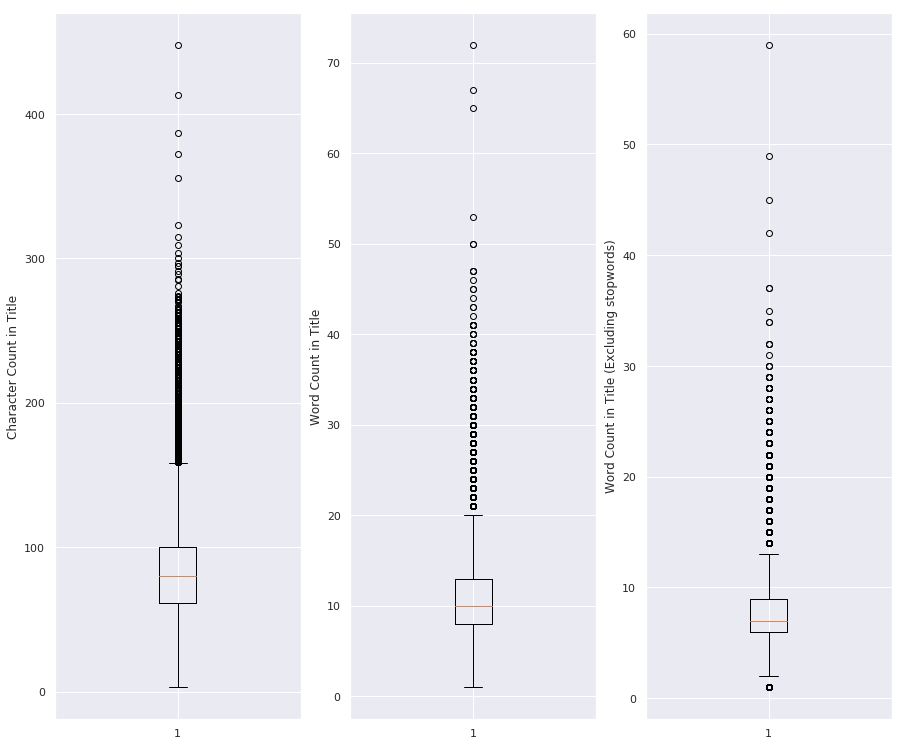

In [35]:
# What is the distribution of word counts in these papers 

b = plt.figure(figsize=(15,13))

bx11 = b.add_subplot(131)
bx12 = b.add_subplot(132)
bx13 = b.add_subplot(133)


bx11.boxplot(data['character_count'])
bx11.set_ylabel("Character Count in Title")

bx12.boxplot(data['word_count'])
bx12.set_ylabel("Word Count in Title")

bx13.boxplot(data['cleaned_title_word_count'])
bx13.set_ylabel("Word Count in Title (Excluding stopwords)")

#bx13.set_tight_layout()

b.show()

In [7]:
# histogram of character/word distribution - with and without log scale

Total Number of publications: 219


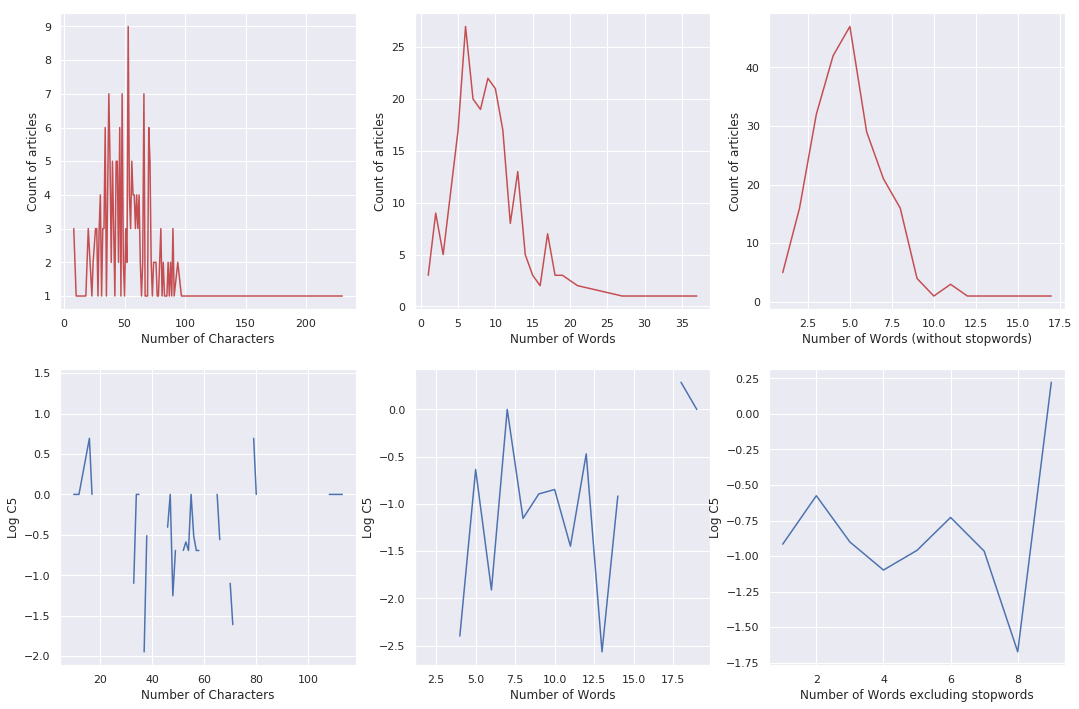

In [29]:
# distribution of word counts in the year 1910 & how the variation of citation is with the word count in this year

data1910 = data[data.PubYear_x == 1910]
print("Total Number of publications:", len(data1910))

data1910_character_distribution = data1910.groupby(['character_count']).size().reset_index(name='counts')
data1910_word_distribution = data1910.groupby(['word_count']).size().reset_index(name='counts')
data1910_word_distribution_without_stopwords = data1910.groupby(['cleaned_title_word_count']).size().reset_index(name='counts')

f1 = plt.figure(figsize=(18,12))
ax11 = f1.add_subplot(231)
ax12 = f1.add_subplot(232)
ax13 = f1.add_subplot(233)
ax14 = f1.add_subplot(234)
ax15 = f1.add_subplot(235)
ax16 = f1.add_subplot(236)


ax11.plot(data1910_character_distribution['character_count'], data1910_character_distribution['counts'], 'r')
ax11.set_xlabel("Number of Characters")
ax11.set_ylabel("Count of articles")

ax12.plot(data1910_word_distribution['word_count'], data1910_word_distribution['counts'], 'r')
ax12.set_xlabel("Number of Words")
ax12.set_ylabel("Count of articles")

ax13.plot(data1910_word_distribution_without_stopwords['cleaned_title_word_count'], data1910_word_distribution_without_stopwords['counts'],'r')
ax13.set_xlabel("Number of Words (without stopwords)")
ax13.set_ylabel("Count of articles")


data1910_avg_c5_for_character_count = data1910.groupby(['character_count'], as_index=False)['c5'].mean()
data1910_avg_c5_for_character_count['avg_log_c5'] = data1910_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax14.plot(data1910_avg_c5_for_character_count['character_count'], data1910_avg_c5_for_character_count['avg_log_c5'])
ax14.set_xlabel("Number of Characters")
ax14.set_ylabel("Log C5")

data1910_avg_c5_for_word_count = data1910.groupby(['word_count'], as_index=False)['c5'].mean()
data1910_avg_c5_for_word_count['avg_log_c5'] = data1910_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax15.plot(data1910_avg_c5_for_word_count['word_count'], data1910_avg_c5_for_word_count['avg_log_c5'])
ax15.set_xlabel("Number of Words")
ax15.set_ylabel("Log C5")

data1910_avg_c5_for_word_count_without_stp = data1910.groupby(['cleaned_title_word_count'], as_index=False)['c5'].mean()
data1910_avg_c5_for_word_count_without_stp['avg_log_c5'] = data1910_avg_c5_for_word_count_without_stp['c5'].apply(lambda x: np.log(x))
ax16.plot(data1910_avg_c5_for_word_count_without_stp['cleaned_title_word_count'], data1910_avg_c5_for_word_count_without_stp['avg_log_c5'])
ax16.set_xlabel("Number of Words excluding stopwords")
ax16.set_ylabel("Log C5")

f1.show()

Total Number of publications: 281


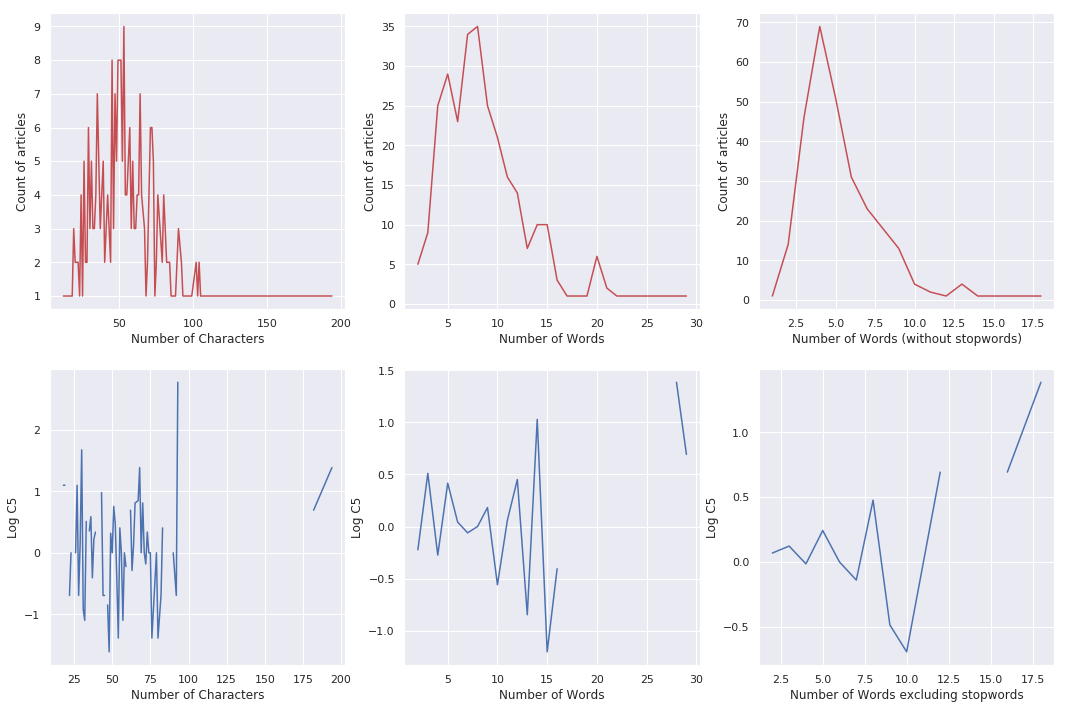

In [28]:
# distribution of word counts in the year 1930 & how the variation of citation is with the word count in this year
data1930 = data[data.PubYear_x == 1930]
print("Total Number of publications:", len(data1930))

data1930_character_distribution = data1930.groupby(['character_count']).size().reset_index(name='counts')
data1930_word_distribution = data1930.groupby(['word_count']).size().reset_index(name='counts')
data1930_word_distribution_without_stopwords = data1930.groupby(['cleaned_title_word_count']).size().reset_index(name='counts')

f2 = plt.figure(figsize=(18,12))
ax21 = f2.add_subplot(231)
ax22 = f2.add_subplot(232)
ax23 = f2.add_subplot(233)
ax24 = f2.add_subplot(234)
ax25 = f2.add_subplot(235)
ax26 = f2.add_subplot(236)


ax21.plot(data1930_character_distribution['character_count'], data1930_character_distribution['counts'], 'r')
ax21.set_xlabel("Number of Characters")
ax21.set_ylabel("Count of articles")

ax22.plot(data1930_word_distribution['word_count'], data1930_word_distribution['counts'], 'r')
ax22.set_xlabel("Number of Words")
ax22.set_ylabel("Count of articles")

ax23.plot(data1930_word_distribution_without_stopwords['cleaned_title_word_count'], data1930_word_distribution_without_stopwords['counts'],'r')
ax23.set_xlabel("Number of Words (without stopwords)")
ax23.set_ylabel("Count of articles")


data1930_avg_c5_for_character_count = data1930.groupby(['character_count'], as_index=False)['c5'].mean()
data1930_avg_c5_for_character_count['avg_log_c5'] = data1930_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax24.plot(data1930_avg_c5_for_character_count['character_count'], data1930_avg_c5_for_character_count['avg_log_c5'])
ax24.set_xlabel("Number of Characters")
ax24.set_ylabel("Log C5")

data1930_avg_c5_for_word_count = data1930.groupby(['word_count'], as_index=False)['c5'].mean()
data1930_avg_c5_for_word_count['avg_log_c5'] = data1930_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax25.plot(data1930_avg_c5_for_word_count['word_count'], data1930_avg_c5_for_word_count['avg_log_c5'])
ax25.set_xlabel("Number of Words")
ax25.set_ylabel("Log C5")

data1930_avg_c5_for_word_count_without_stp = data1930.groupby(['cleaned_title_word_count'], as_index=False)['c5'].mean()
data1930_avg_c5_for_word_count_without_stp['avg_log_c5'] = data1930_avg_c5_for_word_count_without_stp['c5'].apply(lambda x: np.log(x))
ax26.plot(data1930_avg_c5_for_word_count_without_stp['cleaned_title_word_count'], data1930_avg_c5_for_word_count_without_stp['avg_log_c5'])
ax26.set_xlabel("Number of Words excluding stopwords")
ax26.set_ylabel("Log C5")

f2.show()

Total Number of publications: 878


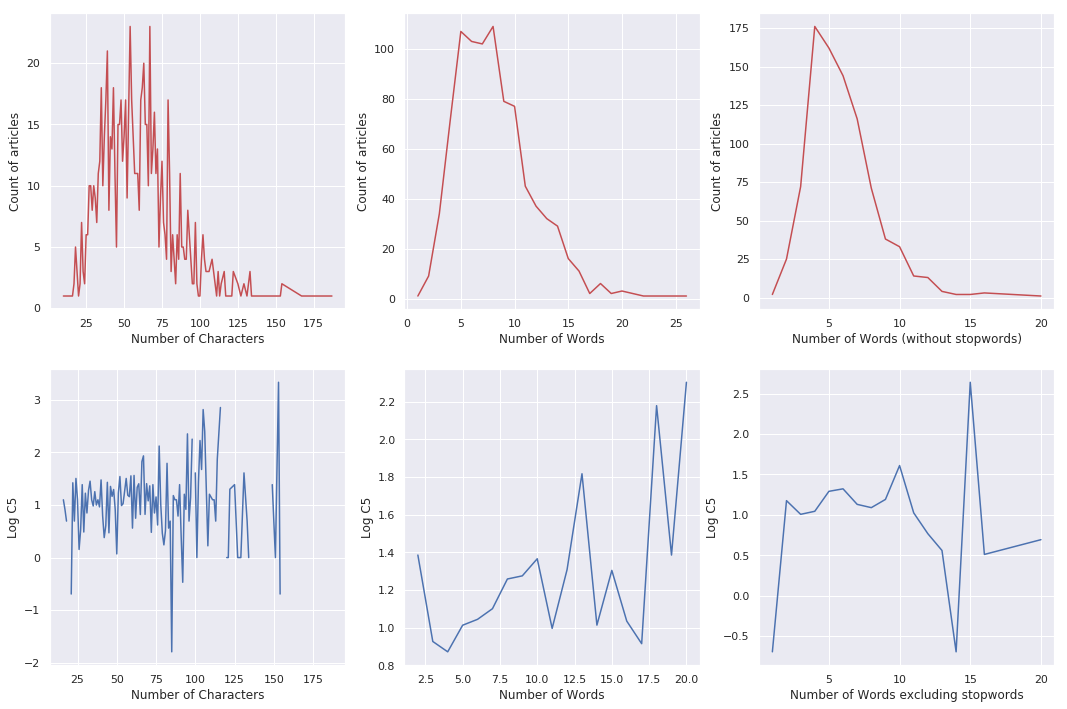

In [27]:
# distribution of word counts in the year 1950 & how the variation of citation is with the word count in this year
data1950 = data[data.PubYear_x == 1950]
print("Total Number of publications:", len(data1950))

data1950_character_distribution = data1950.groupby(['character_count']).size().reset_index(name='counts')
data1950_word_distribution = data1950.groupby(['word_count']).size().reset_index(name='counts')
data1950_word_distribution_without_stopwords = data1950.groupby(['cleaned_title_word_count']).size().reset_index(name='counts')

f3 = plt.figure(figsize=(18,12))
ax31 = f3.add_subplot(231)
ax32 = f3.add_subplot(232)
ax33 = f3.add_subplot(233)
ax34 = f3.add_subplot(234)
ax35 = f3.add_subplot(235)
ax36 = f3.add_subplot(236)


ax31.plot(data1950_character_distribution['character_count'], data1950_character_distribution['counts'], 'r')
ax31.set_xlabel("Number of Characters")
ax31.set_ylabel("Count of articles")

ax32.plot(data1950_word_distribution['word_count'], data1950_word_distribution['counts'], 'r')
ax32.set_xlabel("Number of Words")
ax32.set_ylabel("Count of articles")

ax33.plot(data1950_word_distribution_without_stopwords['cleaned_title_word_count'], data1950_word_distribution_without_stopwords['counts'],'r')
ax33.set_xlabel("Number of Words (without stopwords)")
ax33.set_ylabel("Count of articles")


data1950_avg_c5_for_character_count = data1950.groupby(['character_count'], as_index=False)['c5'].mean()
data1950_avg_c5_for_character_count['avg_log_c5'] = data1950_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax34.plot(data1950_avg_c5_for_character_count['character_count'], data1950_avg_c5_for_character_count['avg_log_c5'])
ax34.set_xlabel("Number of Characters")
ax34.set_ylabel("Log C5")

data1950_avg_c5_for_word_count = data1950.groupby(['word_count'], as_index=False)['c5'].mean()
data1950_avg_c5_for_word_count['avg_log_c5'] = data1950_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax35.plot(data1950_avg_c5_for_word_count['word_count'], data1950_avg_c5_for_word_count['avg_log_c5'])
ax35.set_xlabel("Number of Words")
ax35.set_ylabel("Log C5")

data1950_avg_c5_for_word_count_without_stp = data1950.groupby(['cleaned_title_word_count'], as_index=False)['c5'].mean()
data1950_avg_c5_for_word_count_without_stp['avg_log_c5'] = data1950_avg_c5_for_word_count_without_stp['c5'].apply(lambda x: np.log(x))
ax36.plot(data1950_avg_c5_for_word_count_without_stp['cleaned_title_word_count'], data1950_avg_c5_for_word_count_without_stp['avg_log_c5'])
ax36.set_xlabel("Number of Words excluding stopwords")
ax36.set_ylabel("Log C5")

f3.show()

Total Number of publications: 5473


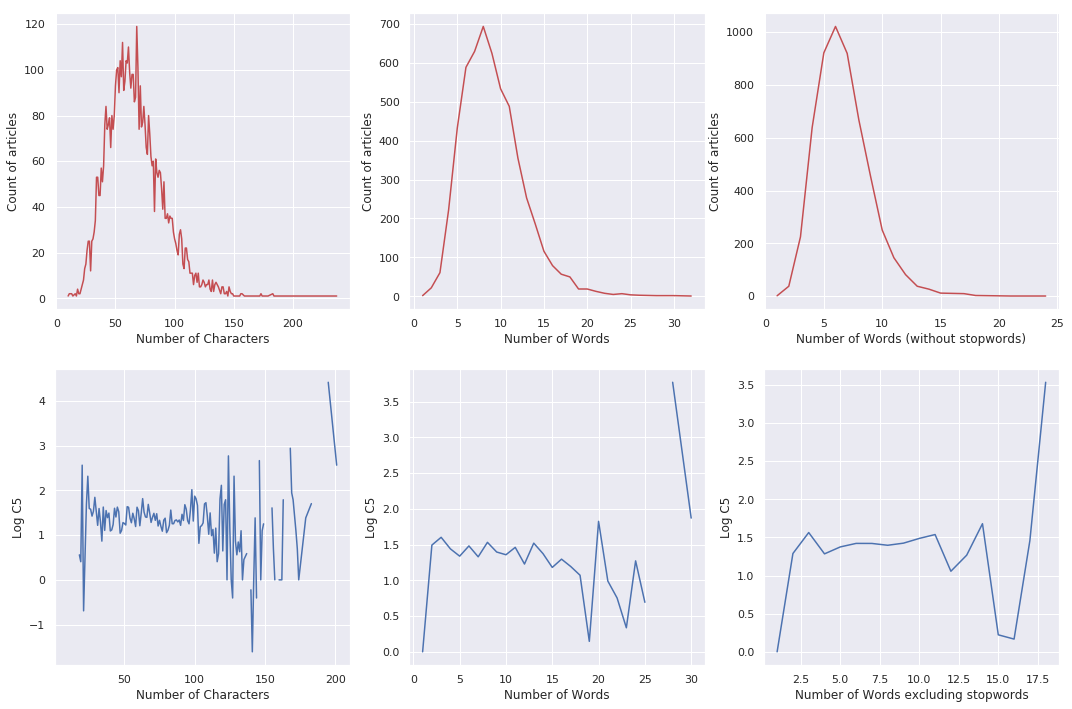

In [26]:
# distribution of word counts in the year 1970 & how the variation of citation is with the word count in this year
data1970 = data[data.PubYear_x == 1970]
print("Total Number of publications:", len(data1970))

data1970_character_distribution = data1970.groupby(['character_count']).size().reset_index(name='counts')
data1970_word_distribution = data1970.groupby(['word_count']).size().reset_index(name='counts')
data1970_word_distribution_without_stopwords = data1970.groupby(['cleaned_title_word_count']).size().reset_index(name='counts')

f4 = plt.figure(figsize=(18,12))
ax41 = f4.add_subplot(231)
ax42 = f4.add_subplot(232)
ax43 = f4.add_subplot(233)
ax44 = f4.add_subplot(234)
ax45 = f4.add_subplot(235)
ax46 = f4.add_subplot(236)


ax41.plot(data1970_character_distribution['character_count'], data1970_character_distribution['counts'], 'r')
ax41.set_xlabel("Number of Characters")
ax41.set_ylabel("Count of articles")

ax42.plot(data1970_word_distribution['word_count'], data1970_word_distribution['counts'], 'r')
ax42.set_xlabel("Number of Words")
ax42.set_ylabel("Count of articles")

ax43.plot(data1970_word_distribution_without_stopwords['cleaned_title_word_count'], data1970_word_distribution_without_stopwords['counts'],'r')
ax43.set_xlabel("Number of Words (without stopwords)")
ax43.set_ylabel("Count of articles")


data1970_avg_c5_for_character_count = data1970.groupby(['character_count'], as_index=False)['c5'].mean()
data1970_avg_c5_for_character_count['avg_log_c5'] = data1970_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax44.plot(data1970_avg_c5_for_character_count['character_count'], data1970_avg_c5_for_character_count['avg_log_c5'])
ax44.set_xlabel("Number of Characters")
ax44.set_ylabel("Log C5")

data1970_avg_c5_for_word_count = data1970.groupby(['word_count'], as_index=False)['c5'].mean()
data1970_avg_c5_for_word_count['avg_log_c5'] = data1970_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax45.plot(data1970_avg_c5_for_word_count['word_count'], data1970_avg_c5_for_word_count['avg_log_c5'])
ax45.set_xlabel("Number of Words")
ax45.set_ylabel("Log C5")

data1970_avg_c5_for_word_count_without_stp = data1970.groupby(['cleaned_title_word_count'], as_index=False)['c5'].mean()
data1970_avg_c5_for_word_count_without_stp['avg_log_c5'] = data1970_avg_c5_for_word_count_without_stp['c5'].apply(lambda x: np.log(x))
ax46.plot(data1970_avg_c5_for_word_count_without_stp['cleaned_title_word_count'], data1970_avg_c5_for_word_count_without_stp['avg_log_c5'])
ax46.set_xlabel("Number of Words excluding stopwords")
ax46.set_ylabel("Log C5")

f4.show()

Total Number of publications: 18381


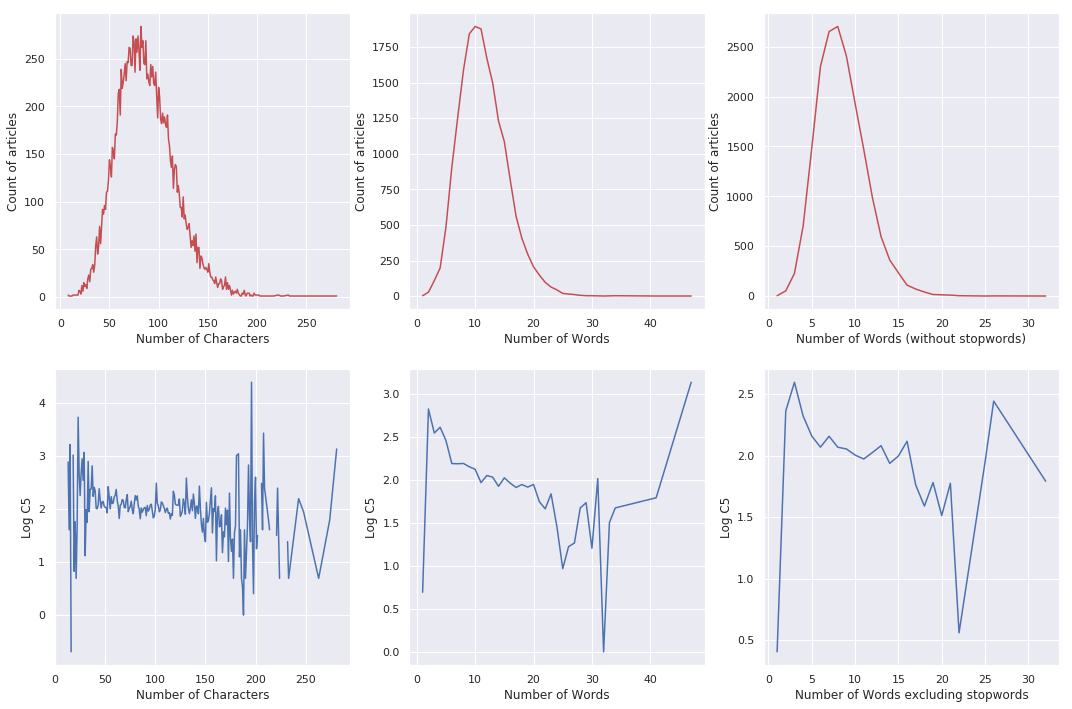

In [25]:
# distribution of word counts in the year 2000 & how the variation of citation is with the word count in this year
data2000 = data[data.PubYear_x == 2000]
print("Total Number of publications:", len(data2000))

data2000_character_distribution = data2000.groupby(['character_count']).size().reset_index(name='counts')
data2000_word_distribution = data2000.groupby(['word_count']).size().reset_index(name='counts')
data2000_word_distribution_without_stopwords = data2000.groupby(['cleaned_title_word_count']).size().reset_index(name='counts')

f5 = plt.figure(figsize=(18,12))
ax51 = f5.add_subplot(231)
ax52 = f5.add_subplot(232)
ax53 = f5.add_subplot(233)
ax54 = f5.add_subplot(234)
ax55 = f5.add_subplot(235)
ax56 = f5.add_subplot(236)


ax51.plot(data2000_character_distribution['character_count'], data2000_character_distribution['counts'], 'r')
ax51.set_xlabel("Number of Characters")
ax51.set_ylabel("Count of articles")

ax52.plot(data2000_word_distribution['word_count'], data2000_word_distribution['counts'], 'r')
ax52.set_xlabel("Number of Words")
ax52.set_ylabel("Count of articles")

ax53.plot(data2000_word_distribution_without_stopwords['cleaned_title_word_count'], data2000_word_distribution_without_stopwords['counts'],'r')
ax53.set_xlabel("Number of Words (without stopwords)")
ax53.set_ylabel("Count of articles")


data2000_avg_c5_for_character_count = data2000.groupby(['character_count'], as_index=False)['c5'].mean()
data2000_avg_c5_for_character_count['avg_log_c5'] = data2000_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax54.plot(data2000_avg_c5_for_character_count['character_count'], data2000_avg_c5_for_character_count['avg_log_c5'])
ax54.set_xlabel("Number of Characters")
ax54.set_ylabel("Log C5")

data2000_avg_c5_for_word_count = data2000.groupby(['word_count'], as_index=False)['c5'].mean()
data2000_avg_c5_for_word_count['avg_log_c5'] = data2000_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax55.plot(data2000_avg_c5_for_word_count['word_count'], data2000_avg_c5_for_word_count['avg_log_c5'])
ax55.set_xlabel("Number of Words")
ax55.set_ylabel("Log C5")

data2000_avg_c5_for_word_count_without_stp = data2000.groupby(['cleaned_title_word_count'], as_index=False)['c5'].mean()
data2000_avg_c5_for_word_count_without_stp['avg_log_c5'] = data2000_avg_c5_for_word_count_without_stp['c5'].apply(lambda x: np.log(x))
ax56.plot(data2000_avg_c5_for_word_count_without_stp['cleaned_title_word_count'], data2000_avg_c5_for_word_count_without_stp['avg_log_c5'])
ax56.set_xlabel("Number of Words excluding stopwords")
ax56.set_ylabel("Log C5")

f5.show()

Total Number of publications: 27063


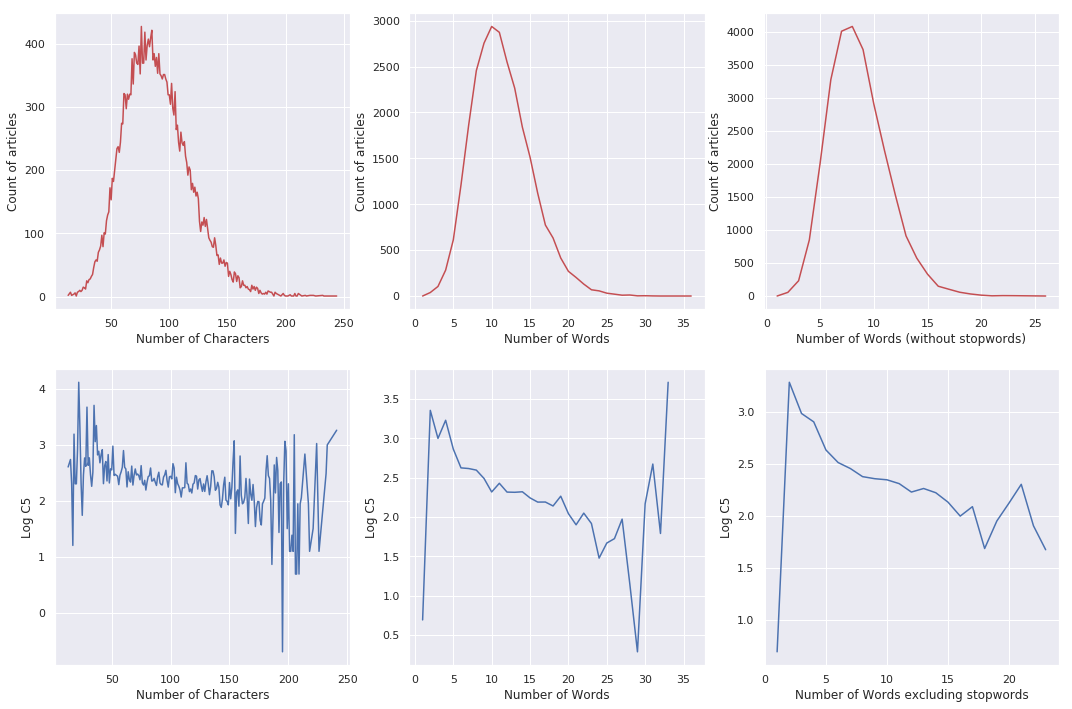

In [24]:
# distribution of word counts in the year 2005 & how the variation of citation is with the word count in this year
data2005 = data[data.PubYear_x == 2005]
print("Total Number of publications:", len(data2005))

data2005_character_distribution = data2005.groupby(['character_count']).size().reset_index(name='counts')
data2005_word_distribution = data2005.groupby(['word_count']).size().reset_index(name='counts')
data2005_word_distribution_without_stopwords = data2005.groupby(['cleaned_title_word_count']).size().reset_index(name='counts')

f6 = plt.figure(figsize=(18,12))
ax61 = f6.add_subplot(231)
ax62 = f6.add_subplot(232)
ax63 = f6.add_subplot(233)
ax64 = f6.add_subplot(234)
ax65 = f6.add_subplot(235)
ax66 = f6.add_subplot(236)


ax61.plot(data2005_character_distribution['character_count'], data2005_character_distribution['counts'], 'r')
ax61.set_xlabel("Number of Characters")
ax61.set_ylabel("Count of articles")

ax62.plot(data2005_word_distribution['word_count'], data2005_word_distribution['counts'], 'r')
ax62.set_xlabel("Number of Words")
ax62.set_ylabel("Count of articles")

ax63.plot(data2005_word_distribution_without_stopwords['cleaned_title_word_count'], data2005_word_distribution_without_stopwords['counts'],'r')
ax63.set_xlabel("Number of Words (without stopwords)")
ax63.set_ylabel("Count of articles")


data2005_avg_c5_for_character_count = data2005.groupby(['character_count'], as_index=False)['c5'].mean()
data2005_avg_c5_for_character_count['avg_log_c5'] = data2005_avg_c5_for_character_count['c5'].apply(lambda x: np.log(x))
ax64.plot(data2005_avg_c5_for_character_count['character_count'], data2005_avg_c5_for_character_count['avg_log_c5'])
ax64.set_xlabel("Number of Characters")
ax64.set_ylabel("Log C5")

data2005_avg_c5_for_word_count = data2005.groupby(['word_count'], as_index=False)['c5'].mean()
data2005_avg_c5_for_word_count['avg_log_c5'] = data2005_avg_c5_for_word_count['c5'].apply(lambda x: np.log(x))
ax65.plot(data2005_avg_c5_for_word_count['word_count'], data2005_avg_c5_for_word_count['avg_log_c5'])
ax65.set_xlabel("Number of Words")
ax65.set_ylabel("Log C5")

data2005_avg_c5_for_word_count_without_stp = data2005.groupby(['cleaned_title_word_count'], as_index=False)['c5'].mean()
data2005_avg_c5_for_word_count_without_stp['avg_log_c5'] = data2005_avg_c5_for_word_count_without_stp['c5'].apply(lambda x: np.log(x))
ax66.plot(data2005_avg_c5_for_word_count_without_stp['cleaned_title_word_count'], data2005_avg_c5_for_word_count_without_stp['avg_log_c5'])
ax66.set_xlabel("Number of Words excluding stopwords")
ax66.set_ylabel("Log C5")

f6.show()

In [18]:
# Examine the relationship of log_c5 to the number of words considering only one year
# For papers which was released in a year, what was the variation of log_c5 wrt to the number of words


# group the papers by year and number of words
data_grouped_wrt_year_word_count = data.groupby(['PubYear_x'], as_index=False)['c5'].mean()

# subtract every article's c5 from average c5 that year and divide by the average c5 for the year
data_grouped_wrt_year_word_count = data_grouped_wrt_year_word_count.rename(columns={"c5": "mean_c5_for_year"})

data = data.merge(data_grouped_wrt_year_word_count,
                  how = 'left',
                  on = 'PubYear_x')
data.head()

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year
0,A1981LJ96300019,ASCA traditional subject,"Physics, Applied",1981,Article,SURFACE COMPOSITIONAL MODIFICATIONS DURING O-2...,APPLIED PHYSICS LETTERS,Appl. Phys. Lett.,1981,6.0,1.945910,76,8,surface compositional modifications during o2+...,surface compositional modifications o2+ bombar...,6,5.241389
1,A1981MM58300017,ASCA traditional subject,"Physics, Applied",1981,Article,ELECTRON-PHONON INTERACTION AND DEVIATIONS FRO...,JOURNAL OF PHYSICS F-METAL PHYSICS,,1981,0.0,0.000000,85,9,electronphonon interaction and deviations from...,electronphonon interaction deviations matthies...,6,5.241389
2,A1981LV54600009,ASCA traditional subject,"Physics, Applied",1981,Article,EXPLOSIVE GENERATION OF ELECTROMAGNETIC-RADIAT...,ZHURNAL TEKHNICHESKOI FIZIKI,Zhurnal Tek. Fiz.,1981,0.0,0.000000,88,11,explosive generation of electromagneticradiati...,explosive generation electromagneticradiation ...,6,5.241389
3,A1981LX06200023,ASCA traditional subject,"Physics, Applied",1981,Article,PIEZOELECTRIC ZNO TRANSDUCERS PRODUCED BY R.F....,THIN SOLID FILMS,Thin Solid Films,1981,7.0,2.079442,67,8,piezoelectric zno transducers produced by rf m...,piezoelectric zno transducers produced rf magn...,7,5.241389
4,A1981LG93900006,ASCA traditional subject,"Physics, Applied",1981,Article,A MODEL FOR INHOMOGENEOUS CONDUCTION IN ANISOT...,JOURNAL OF PHYSICS F-METAL PHYSICS,,1981,3.0,1.386294,84,12,a model for inhomogeneous conduction in anisot...,model inhomogeneous conduction anisotropic mat...,7,5.241389


In [19]:
def normalize_c5(row):
    return row['c5'] - row['mean_c5_for_year']

data['normalized_c5'] = data.progress_apply(normalize_c5, axis = 1)
data.head()

Progress: 100%|██████████| 738469/738469 [00:16<00:00, 45517.14it/s]


,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year,normalized_c5
0,A1981LJ96300019,ASCA traditional subject,"Physics, Applied",1981,Article,SURFACE COMPOSITIONAL MODIFICATIONS DURING O-2...,APPLIED PHYSICS LETTERS,Appl. Phys. Lett.,1981,6.0,1.945910,76,8,surface compositional modifications during o2+...,surface compositional modifications o2+ bombar...,6,5.241389,0.758611
1,A1981MM58300017,ASCA traditional subject,"Physics, Applied",1981,Article,ELECTRON-PHONON INTERACTION AND DEVIATIONS FRO...,JOURNAL OF PHYSICS F-METAL PHYSICS,,1981,0.0,0.000000,85,9,electronphonon interaction and deviations from...,electronphonon interaction deviations matthies...,6,5.241389,-5.241389
2,A1981LV54600009,ASCA traditional subject,"Physics, Applied",1981,Article,EXPLOSIVE GENERATION OF ELECTROMAGNETIC-RADIAT...,ZHURNAL TEKHNICHESKOI FIZIKI,Zhurnal Tek. Fiz.,1981,0.0,0.000000,88,11,explosive generation of electromagneticradiati...,explosive generation electromagneticradiation ...,6,5.241389,-5.241389
3,A1981LX06200023,ASCA traditional subject,"Physics, Applied",1981,Article,PIEZOELECTRIC ZNO TRANSDUCERS PRODUCED BY R.F....,THIN SOLID FILMS,Thin Solid Films,1981,7.0,2.079442,67,8,piezoelectric zno transducers produced by rf m...,piezoelectric zno transducers produced rf magn...,7,5.241389,1.758611
4,A1981LG93900006,ASCA traditional subject,"Physics, Applied",1981,Article,A MODEL FOR INHOMOGENEOUS CONDUCTION IN ANISOT...,JOURNAL OF PHYSICS F-METAL PHYSICS,,1981,3.0,1.386294,84,12,a model for inhomogeneous conduction in anisot...,model inhomogeneous conduction anisotropic mat...,7,5.241389,-2.241389


In [20]:
# mean of c5 score - grouped by year and word count

data_grouped_wrt_year_word_count = data.groupby(["PubYear_x", "word_count"], as_index=False)['normalized_c5'].mean()

data_grouped_wrt_year_word_count["avg_normalized_log_c5"] = data_grouped_wrt_year_word_count['normalized_c5'].progress_apply(lambda x: np.log(x+1))

data_grouped_wrt_year_word_count.head()

Progress: 100%|██████████| 2997/2997 [00:00<00:00, 359635.20it/s]


,PubYear_x,word_count,normalized_c5,avg_normalized_log_c5
0,1900,1,-0.235772,-0.268890
1,1900,2,-0.235772,-0.268890
2,1900,3,-0.235772,-0.268890
3,1900,4,-0.110772,-0.117402
4,1900,5,-0.135772,-0.145919


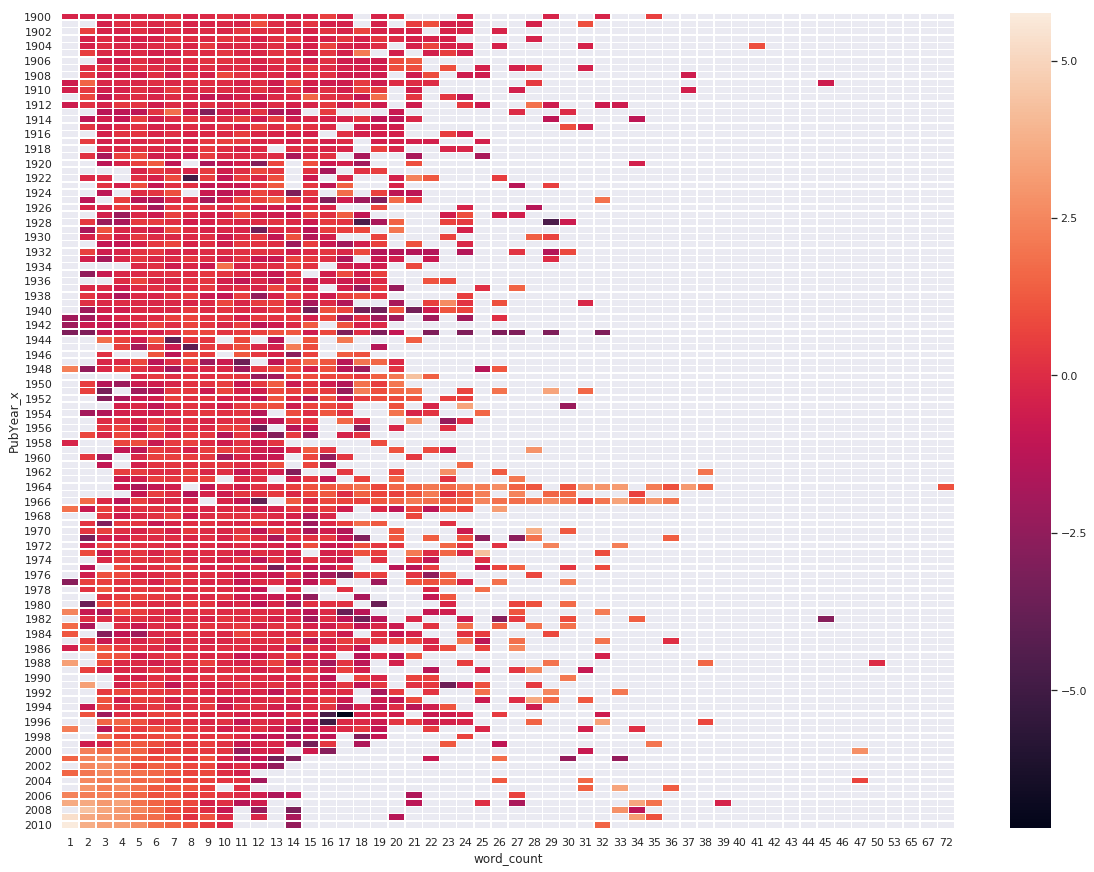

In [21]:
data_pivoted = data_grouped_wrt_year_word_count.pivot("PubYear_x", "word_count", "avg_normalized_log_c5")
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(data_pivoted, linewidths=.5)

plt.show()

In [13]:
# What are the single word titles in 2009/ 2010
data[(data['PubYear_x'] == 2010) & (data["word_count"] == 1)].head()

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year,normalized_c5
596502,000278902400002,ASCA traditional subject,"Physics, Applied",2010,Article,Magnonics,JOURNAL OF PHYSICS D-APPLIED PHYSICS,J. Phys. D-Appl. Phys.,2010,330.0,5.802118,9,1,magnonics,magnonics,1,14.339031,315.660969


In [14]:
# What are the single word titles in 2009/ 2010
data[(data['PubYear_x'] == 2010) & (data["word_count"] == 2)].head()

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year,normalized_c5
588035,000273984800003,ASCA traditional subject,"Physics, Applied",2010,Review,Nanowire Photodetectors,JOURNAL OF NANOSCIENCE AND NANOTECHNOLOGY,J. Nanosci. Nanotechnol.,2010,105.0,4.663439,23,2,nanowire photodetectors,nanowire photodetectors,2,14.339031,90.660969
588977,000273878500006,ASCA traditional subject,"Physics, Applied",2010,Review,Laser-initiated ignitionl,LASER & PHOTONICS REVIEWS,Laser Photon. Rev.,2010,10.0,2.397895,25,2,laserinitiated ignitionl,laserinitiated ignitionl,2,14.339031,-4.339031
592728,000285397100017,ASCA traditional subject,"Physics, Applied",2010,Article,Self-Healing Materials,ADVANCED MATERIALS,Adv. Mater.,2010,191.0,5.257495,22,2,selfhealing materials,selfhealing materials,2,14.339031,176.660969
593815,000281943500013,ASCA traditional subject,"Physics, Applied",2010,Article,Responsive materials,MRS BULLETIN,MRS Bull.,2010,0.0,0.000000,20,2,responsive materials,responsive materials,2,14.339031,-14.339031
594555,000280361400063,ASCA traditional subject,"Physics, Applied",2010,Article,Graphene-CuO Nanocomposite,JOURNAL OF NANOSCIENCE AND NANOTECHNOLOGY,J. Nanosci. Nanotechnol.,2010,13.0,2.639057,26,2,graphenecuo nanocomposite,graphenecuo nanocomposite,2,14.339031,-1.339031


In [15]:
# What are the single word titles in 2009/ 2010
data[(data['PubYear_x'] == 2010) & (data["word_count"] == 3)].head()

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year,normalized_c5
583785,000278422200012,ASCA traditional subject,"Physics, Applied",2010,Article,Exciton-polariton spin switches,NATURE PHOTONICS,Nat. Photonics,2010,85.0,4.454347,31,3,excitonpolariton spin switches,excitonpolariton spin switches,3,14.339031,70.660969
583938,000285089700003,ASCA traditional subject,"Physics, Applied",2010,Article,On multiple-method studies,METROLOGIA,Metrologia,2010,0.0,0.000000,26,3,on multiplemethod studies,multiplemethod studies,2,14.339031,-14.339031
584303,000283371800002,ASCA traditional subject,"Physics, Applied",2010,Article,Optical Intersatellite Communication,IEEE JOURNAL OF SELECTED TOPICS IN QUANTUM ELE...,IEEE J. Sel. Top. Quantum Electron.,2010,10.0,2.397895,36,3,optical intersatellite communication,optical intersatellite communication,3,14.339031,-4.339031
584531,000278037800224,ASCA traditional subject,"Physics, Applied",2010,Article,Thermoelectrically Controlled Spin-Switch,IEEE TRANSACTIONS ON MAGNETICS,IEEE Trans. Magn.,2010,6.0,1.945910,41,3,thermoelectrically controlled spinswitch,thermoelectrically controlled spinswitch,3,14.339031,-8.339031
584692,000275588000054,ASCA traditional subject,"Physics, Applied",2010,Article,Thermomagnetically patterned micromagnets,APPLIED PHYSICS LETTERS,Appl. Phys. Lett.,2010,20.0,3.044522,41,3,thermomagnetically patterned micromagnets,thermomagnetically patterned micromagnets,3,14.339031,5.660969


In [20]:
# What are the single word titles in 2009/ 2010
data[(data['PubYear_x'] == 2010) & (data["word_count"] == 2)]

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year,normalized_c5
588035,000273984800003,ASCA traditional subject,"Physics, Applied",2010,Review,Nanowire Photodetectors,JOURNAL OF NANOSCIENCE AND NANOTECHNOLOGY,J. Nanosci. Nanotechnol.,2010,105.0,4.663439,23,2,nanowire photodetectors,nanowire photodetectors,2,14.339031,90.660969
588977,000273878500006,ASCA traditional subject,"Physics, Applied",2010,Review,Laser-initiated ignitionl,LASER & PHOTONICS REVIEWS,Laser Photon. Rev.,2010,10.0,2.397895,25,2,laserinitiated ignitionl,laserinitiated ignitionl,2,14.339031,-4.339031
592728,000285397100017,ASCA traditional subject,"Physics, Applied",2010,Article,Self-Healing Materials,ADVANCED MATERIALS,Adv. Mater.,2010,191.0,5.257495,22,2,selfhealing materials,selfhealing materials,2,14.339031,176.660969
593815,000281943500013,ASCA traditional subject,"Physics, Applied",2010,Article,Responsive materials,MRS BULLETIN,MRS Bull.,2010,0.0,0.000000,20,2,responsive materials,responsive materials,2,14.339031,-14.339031
594555,000280361400063,ASCA traditional subject,"Physics, Applied",2010,Article,Graphene-CuO Nanocomposite,JOURNAL OF NANOSCIENCE AND NANOTECHNOLOGY,J. Nanosci. Nanotechnol.,2010,13.0,2.639057,26,2,graphenecuo nanocomposite,graphenecuo nanocomposite,2,14.339031,-1.339031
596998,000283077900011,ASCA traditional subject,"Physics, Applied",2010,Article,SUPERCONDUCTOR-INSULATOR TRANSITIONS,INTERNATIONAL JOURNAL OF MODERN PHYSICS B,Int. J. Mod. Phys. B,2010,24.0,3.218876,36,2,superconductorinsulator transitions,superconductorinsulator transitions,2,14.339031,9.660969
598279,000283012800009,ASCA traditional subject,"Physics, Applied",2010,Review,Liquid-crystal lasers,NATURE PHOTONICS,Nat. Photonics,2010,155.0,5.049856,21,2,liquidcrystal lasers,liquidcrystal lasers,2,14.339031,140.660969
599899,000280649700011,ASCA traditional subject,"Physics, Applied",2010,Article,Broadband similariton,LASER PHYSICS,Laser Phys.,2010,2.0,1.098612,21,2,broadband similariton,broadband similariton,2,14.339031,-12.339031
599977,000285056600011,ASCA traditional subject,"Physics, Applied",2010,Article,Mid-Infrared Lasers,IEEE PHOTONICS JOURNAL,IEEE Photonics J.,2010,2.0,1.098612,19,2,midinfrared lasers,midinfrared lasers,2,14.339031,-12.339031
600349,000272608500001,ASCA traditional subject,"Physics, Applied",2010,Article,Five-Primary-Color LCDs,JOURNAL OF DISPLAY TECHNOLOGY,J. Disp. Technol.,2010,13.0,2.639057,23,2,fiveprimarycolor lcds,fiveprimarycolor lcds,2,14.339031,-1.339031


In [22]:
# What are the single word titles in 2009/ 2010
data[(data['PubYear_x'] == 2009) & (data["word_count"] == 1)]

,ArticleID,Type,Label,PubYear_x,Doctypes,Title,Journal,Journal Abbreviation ISO,PubYear_y,c5,log_c5,character_count,word_count,title_without_punct,title_without_stopwords,cleaned_title_word_count,mean_c5_for_year,normalized_c5
543836,000264289600017,ASCA traditional subject,"Physics, Applied",2009,Article,Stereometamaterials,NATURE PHOTONICS,Nat. Photonics,2009,231.0,5.446737,19,1,stereometamaterials,stereometamaterials,1,13.273219,217.726781
562364,000261761800008,ASCA traditional subject,"Physics, Applied",2009,Review,Supermagnetism,JOURNAL OF PHYSICS D-APPLIED PHYSICS,J. Phys. D-Appl. Phys.,2009,203.0,5.318120,14,1,supermagnetism,supermagnetism,1,13.273219,189.726781


In [ ]:



- cdf plot from seaborn/matplotlib
- merge the curves of different years together for the same kindof plot
- hexplot of wordcount vs citations for one year  (intensity of color = number of papers for the year)ß
- hexplot of charcount vs citations for one year